# Proyecto - Desarrollo

## Detección de la ocupación de una oficina a partir de datos de luz, temperatura, humedad y concentración de CO2, por medio del uso de modelos estadísticos lineales.

Alejandro Mantilla - 201711304

Ximena Palacio - 201730995 

In [1]:
library(readr)
datos <- read_csv("Archivos/datos_entrenamiento.csv",
                  show_col_types = FALSE)
head(datos)

id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2015-02-11 14:48:00,21.7600,31.13333,437.3333,1029.667,0.005021011,1
2,2015-02-11 14:49:00,21.7900,31.00000,437.3333,1000.000,0.005008581,1
3,2015-02-11 14:50:00,21.7675,31.12250,434.0000,1003.750,0.005021569,1
4,2015-02-11 14:51:00,21.7675,31.12250,439.0000,1009.500,0.005021569,1
5,2015-02-11 14:51:59,21.7900,31.13333,437.3333,1005.667,0.005030298,1
6,2015-02-11 14:53:00,21.7600,31.26000,437.3333,1014.333,0.005041605,1


In [2]:
dim(datos)

[1] 9752    8

In [3]:
range(datos$date)

[1] "2015-02-11 14:48:00 UTC" "2015-02-18 09:19:00 UTC"

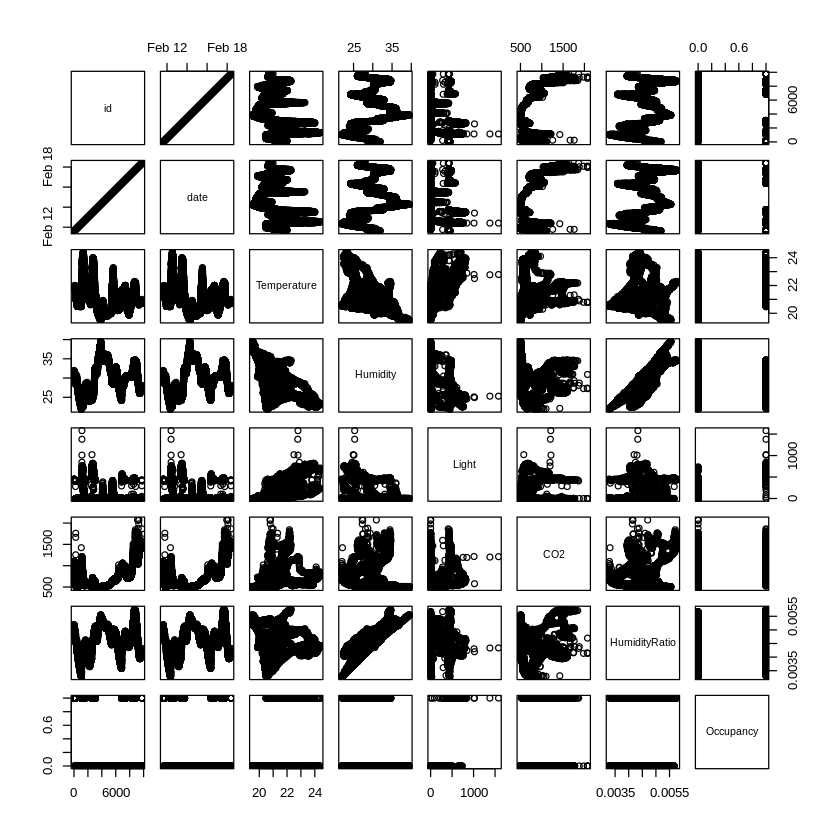

In [4]:
pairs(datos,
      col = "#B04C7A")

In [5]:
summary(datos)

       id            date                         Temperature   
 Min.   :   1   Min.   :2015-02-11 14:48:00.00   Min.   :19.50  
 1st Qu.:2439   1st Qu.:2015-02-13 07:25:44.25   1st Qu.:20.29  
 Median :4876   Median :2015-02-15 00:03:30.00   Median :20.79  
 Mean   :4876   Mean   :2015-02-15 00:03:29.69   Mean   :21.00  
 3rd Qu.:7314   3rd Qu.:2015-02-16 16:41:14.00   3rd Qu.:21.53  
 Max.   :9752   Max.   :2015-02-18 09:19:00.00   Max.   :24.39  
    Humidity         Light             CO2         HumidityRatio     
 Min.   :21.86   Min.   :   0.0   Min.   : 484.7   Min.   :0.003275  
 1st Qu.:26.64   1st Qu.:   0.0   1st Qu.: 542.3   1st Qu.:0.004196  
 Median :30.20   Median :   0.0   Median : 639.0   Median :0.004593  
 Mean   :29.89   Mean   : 123.1   Mean   : 753.2   Mean   :0.004589  
 3rd Qu.:32.70   3rd Qu.: 208.2   3rd Qu.: 831.1   3rd Qu.:0.004998  
 Max.   :39.50   Max.   :1581.0   Max.   :2076.5   Max.   :0.005769  
   Occupancy     
 Min.   :0.0000  
 1st Qu.:0.0000  
 

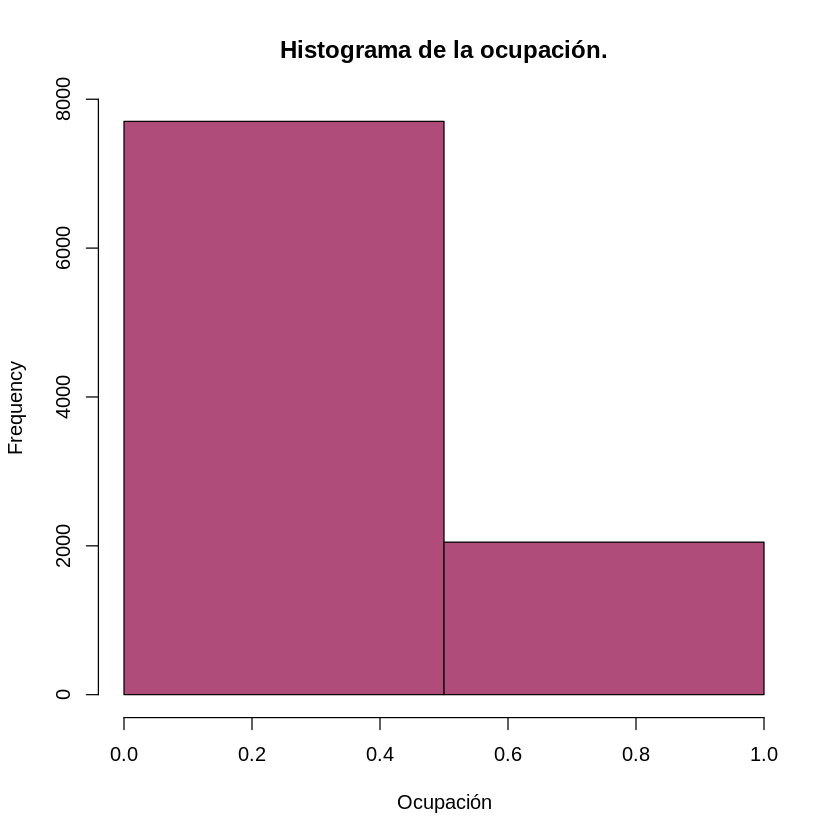

In [37]:
hist(datos$Occupancy, breaks = c(0, 0.5, 1 ),
     col = "#B04C7A",
     main = "Histograma de la ocupación.",
     xlab = "Ocupación")

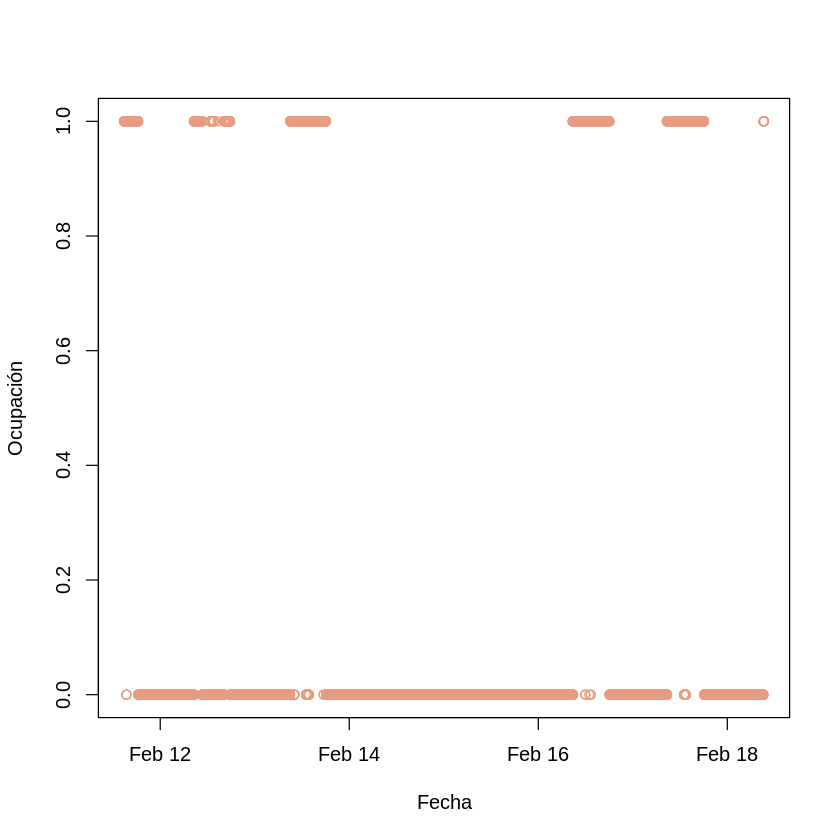

In [38]:
plot(datos$date,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Fecha",
     col = "#E79C82")

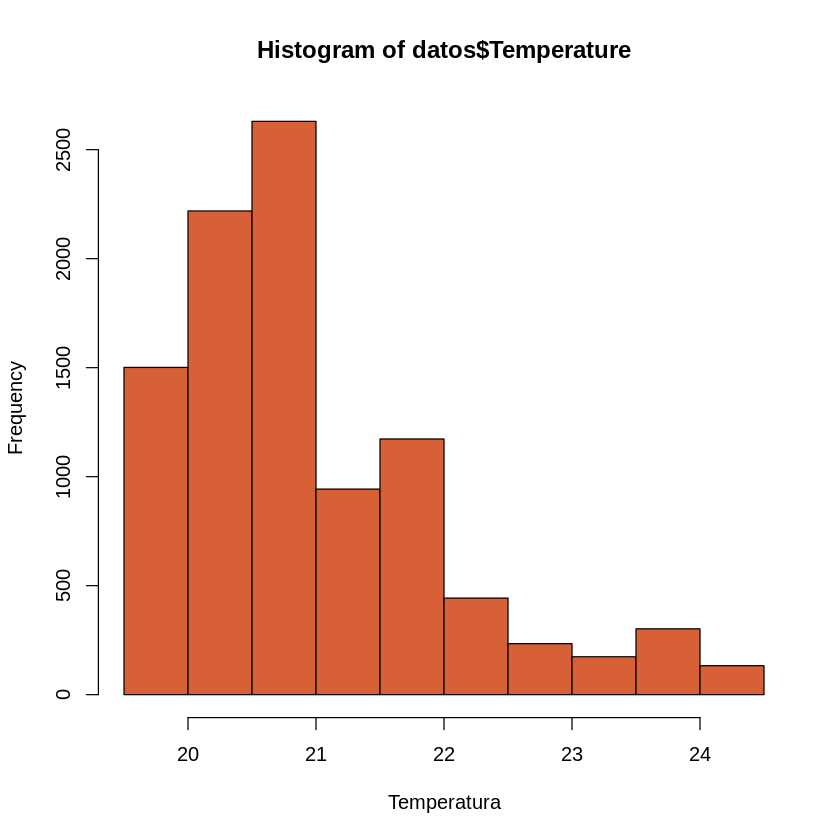

In [39]:
hist(datos$Temperature,
     xlab = "Temperatura",
     col = "#D86036")

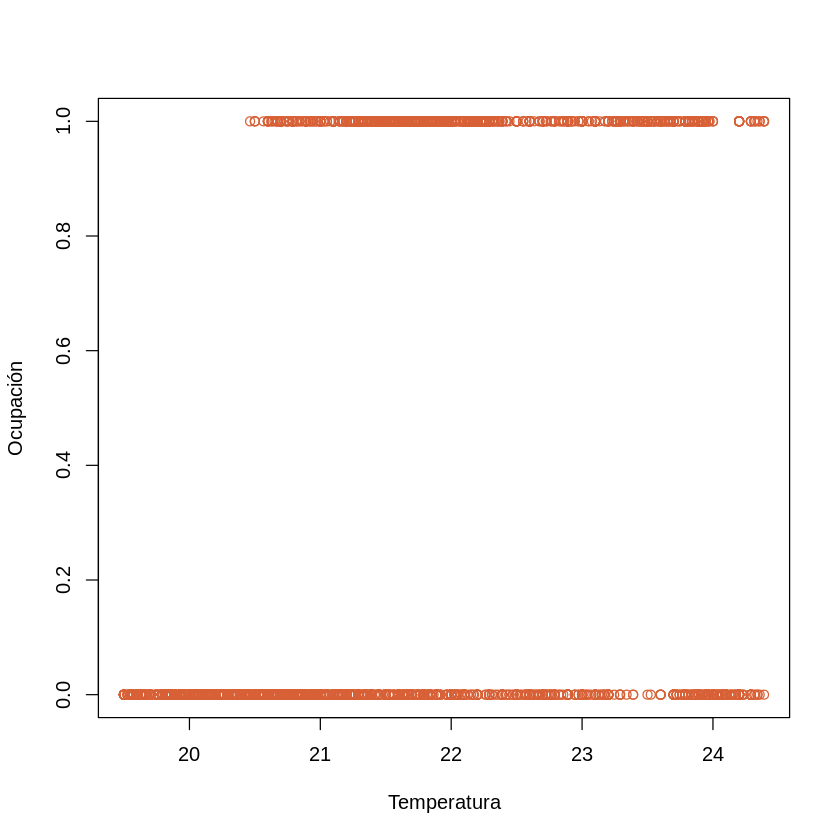

In [40]:
plot(datos$Temperature,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Temperatura",
     col = "#D86036")

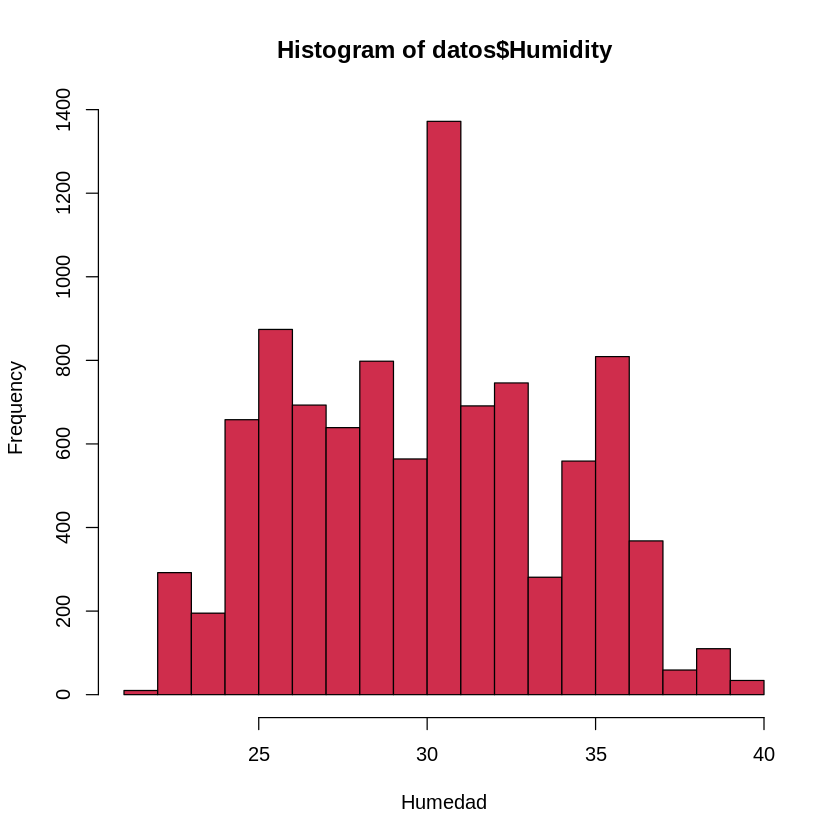

In [41]:
hist(datos$Humidity,
     xlab = "Humedad",
     col = "#CF2D4C")

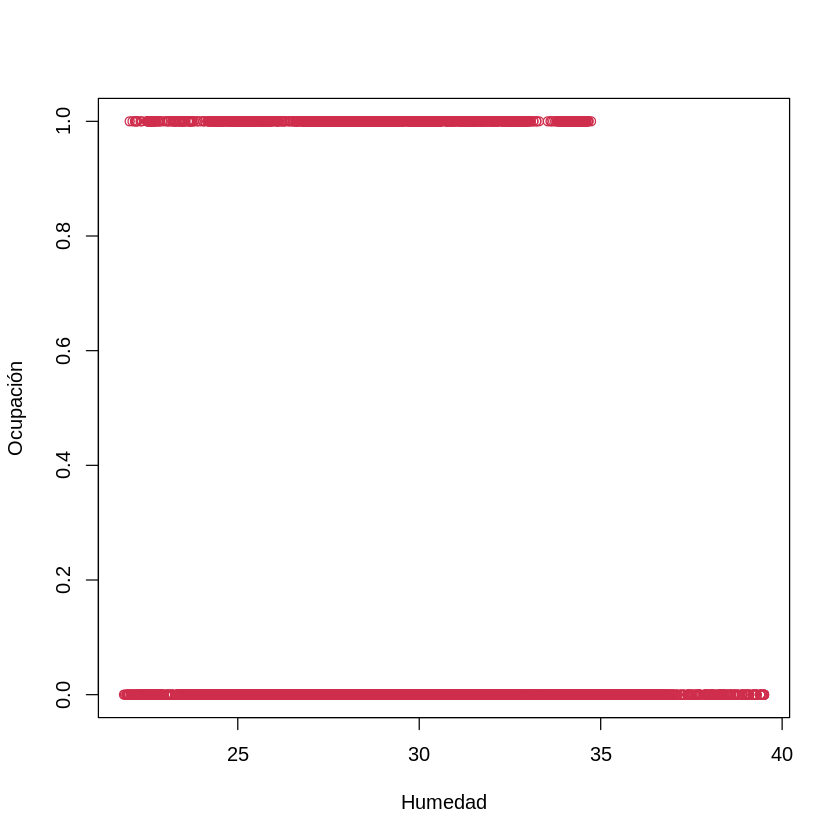

In [42]:
plot(datos$Humidity,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Humedad",
     col = "#CF2D4C")

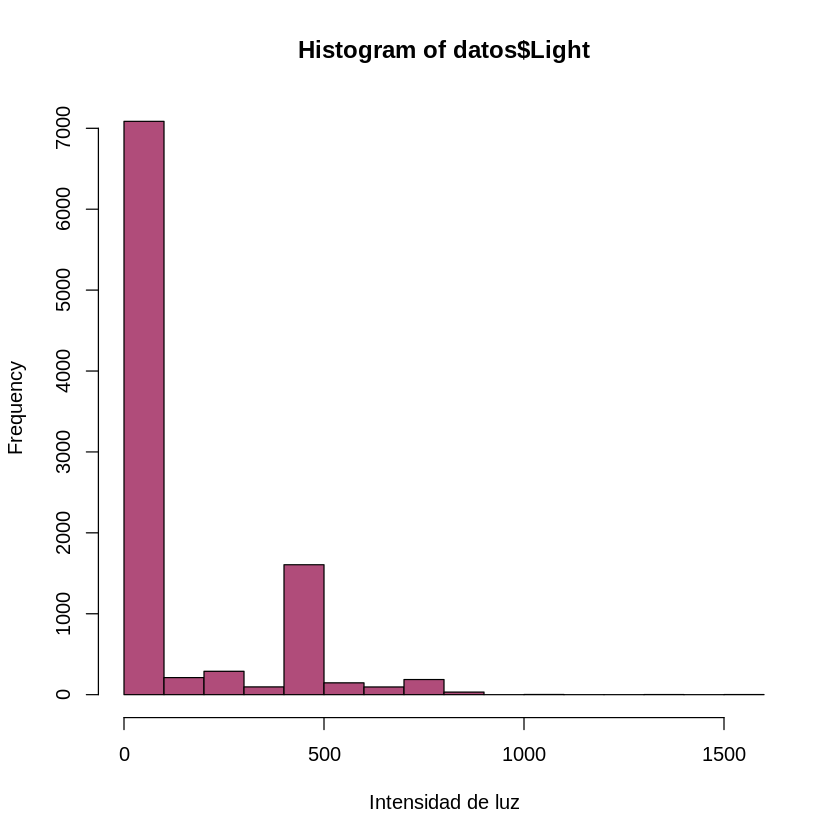

In [43]:
hist(datos$Light,
     xlab = "Intensidad de luz",
     col = "#B04C7A")

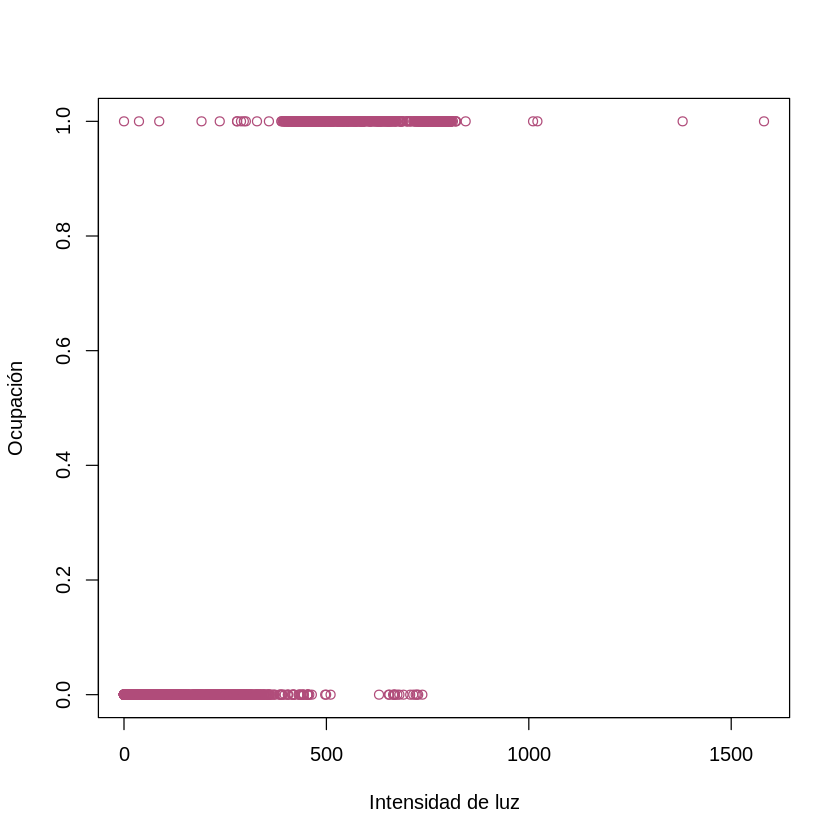

In [44]:
plot(datos$Light,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Intensidad de luz",
     col = "#B04C7A")

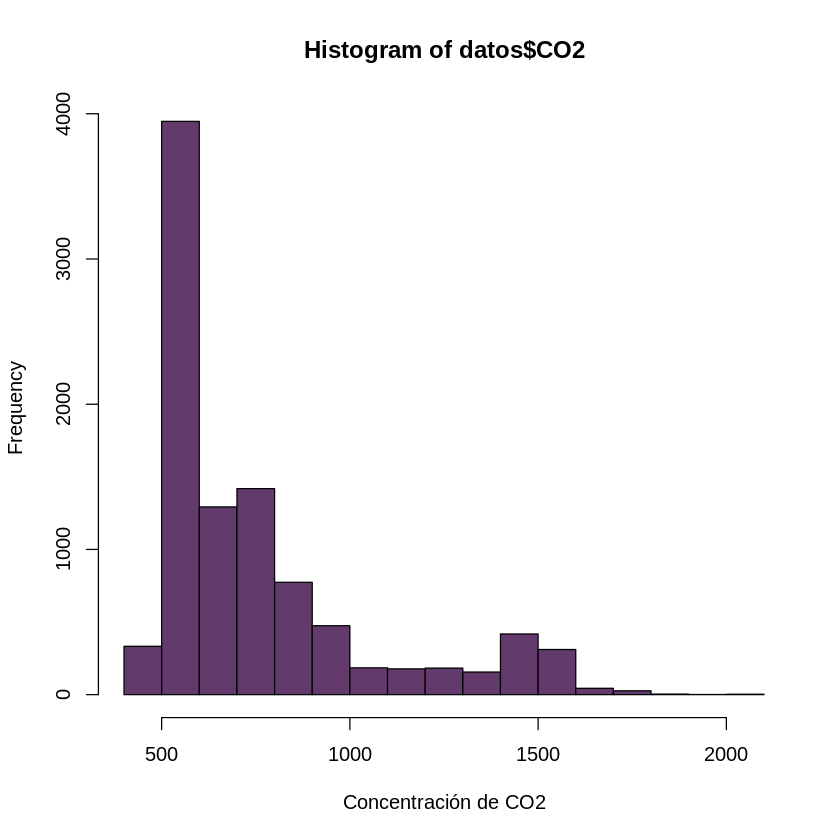

In [45]:
hist(datos$CO2,
     xlab = "Concentración de CO2",
     col = "#623A6C")

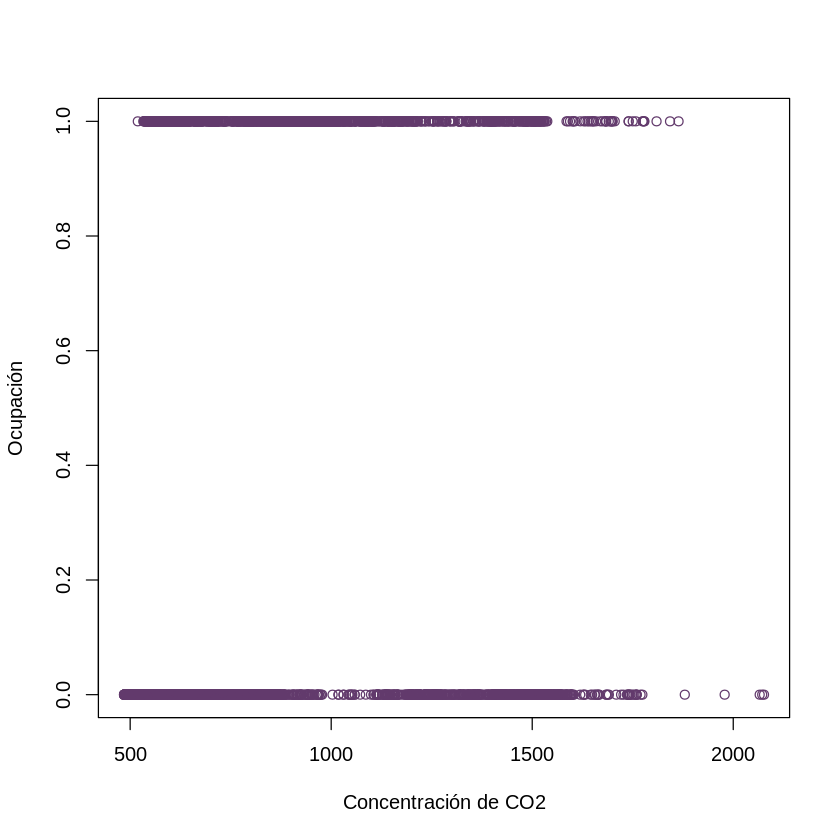

In [46]:
plot(datos$CO2,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Concentración de CO2",
     col = "#623A6C")

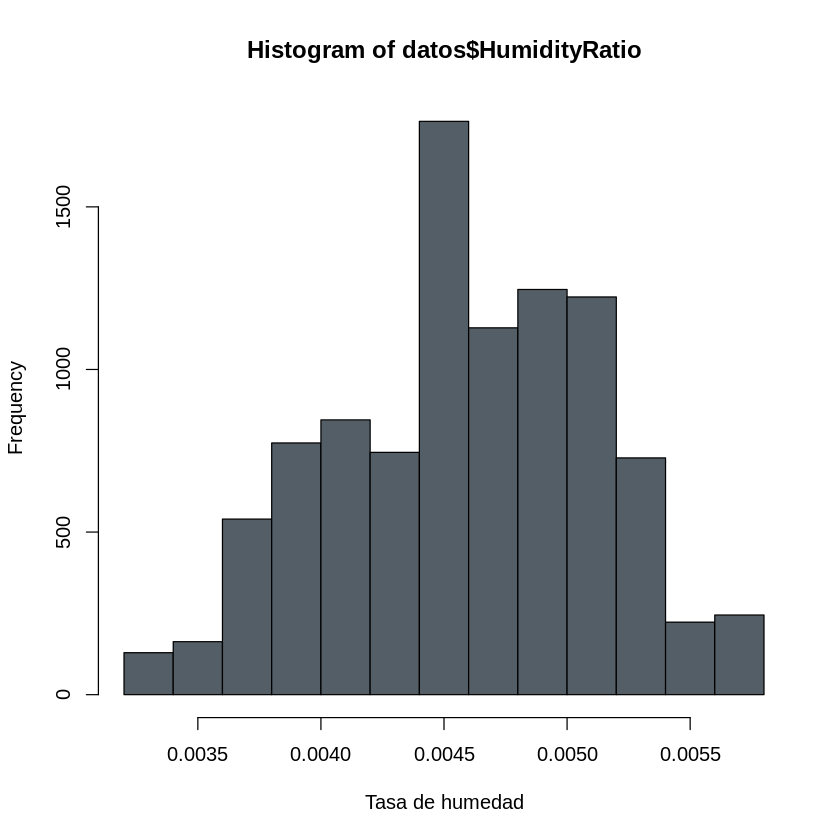

In [47]:
hist(datos$HumidityRatio,
     xlab = "Tasa de humedad",
     col = "#545E66")

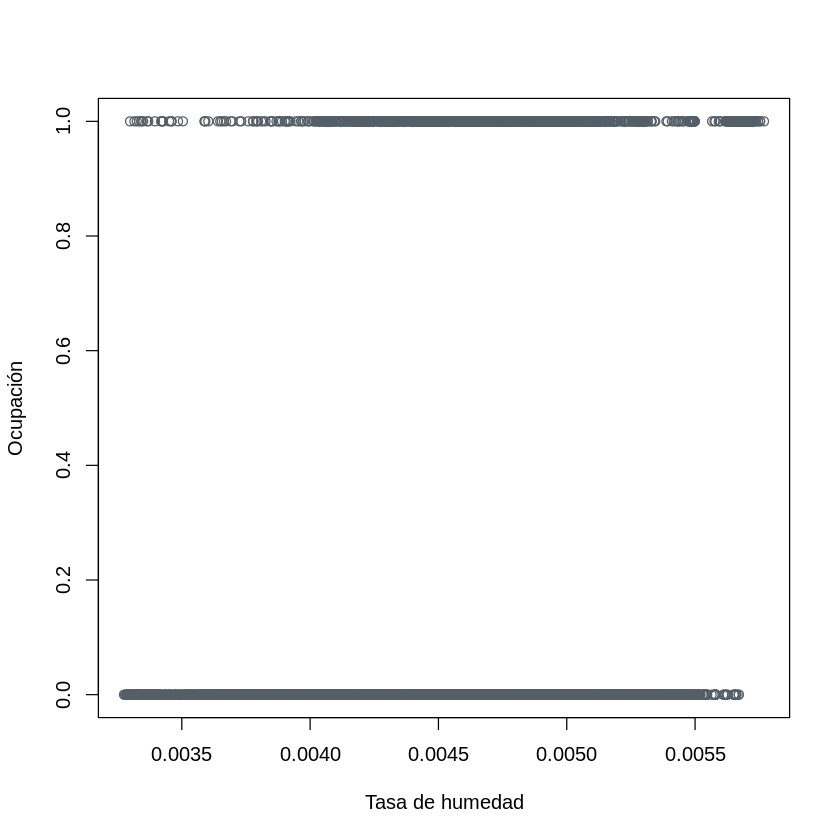

In [48]:
plot(datos$HumidityRatio,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Tasa de humedad",
     col = "#545E66")